In [32]:
import importlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import challenge22

sns.set(font_scale=0.6)

<module 'challenge22' from '/home/justin/Documents/git/challenge22/challenge22.py'>

In [40]:
class Input:
    def __init__(self, log_file: str = 'right.txt'):
        importlib.reload(challenge22)
        self.frame = 0
        self.log_file = log_file
        self.cache = self.get_cache()

    def next_frame(self, frame):
        if frame is not None:
            self.frame = frame
        elif self.frame < len(self.cache):
            self.frame += 1
        else:
            self.frame = 1

    @property
    def max_frame(self):
        return len(self.cache)

    def my_matter(self, frame=None):
        self.next_frame(frame)
        return self.cache[self.frame]['my_matter']

    def op_matter(self, frame=None):
        self.next_frame(frame)
        return self.cache[self.frame]['op_matter']

    def input_array(self, frame=None):
        self.next_frame(frame)
        return self.cache[self.frame]['input_array']
    
    def board(self, frame=None):
        self.next_frame(frame)
        return self.cache[self.frame]['board']
    
    def all(self, frame=None):
        self.next_frame(frame)
        return (
            self.frame,
            self.cache[self.frame]['my_matter'],
            self.cache[self.frame]['op_matter'],
            self.cache[self.frame]['input_array'],
            self.cache[self.frame]['board'],
        )

    def get_cache(self):
        io = challenge22.InputOutput(self.log_file)
        col, row = io.get_input()

        cache = {}
        frame = 0

        while True:
            try:
                frame += 1
                my_matter, op_matter = io.get_input()
                input_array = np.array(io.get_input(row * col)).reshape(row, col, 7)
                cache[frame] = {
                    'my_matter': my_matter,
                    'op_matter': op_matter,
                    'input_array': input_array,
                    'board': challenge22.Board(input_array)
                }
            except EOFError:
                break
        return cache

4

In [37]:
input = Input()
frame, my_matter, op_matter, input_array, board = input.all()

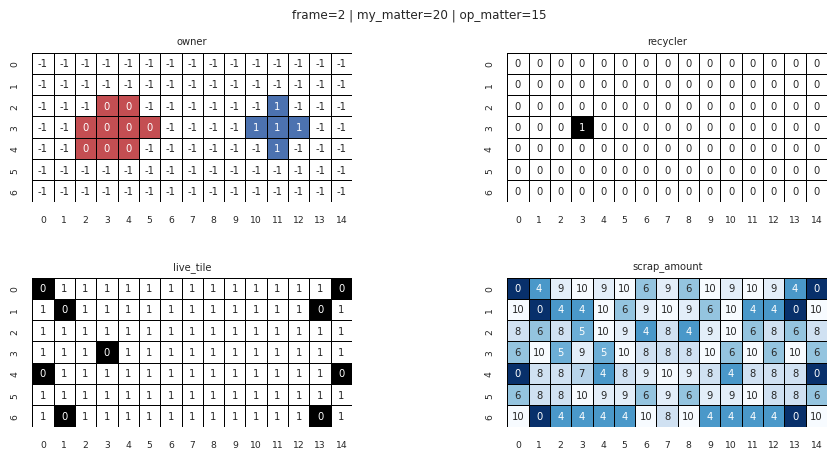

In [5]:
default_params = {'annot': True, 'fmt': "d", 'linecolor': 'black', 'linewidths': .5, 'square': True, 'cbar': False}

frame, my_matter, op_matter, input_array, board = input.all()

fig, ax = plt.subplots(2, 2, figsize=(10, 5))
plt.tight_layout(h_pad=5, pad=5)

plt.suptitle(f'{frame=} | {my_matter=} | {op_matter=}')

sns.heatmap(**default_params, ax=ax[0,0], data=board.owner, cmap=['white','r','b']).set_title('owner')
sns.heatmap(**default_params, ax=ax[1,0], data=board.live_tile, cmap=['black','white']).set_title('live_tile')
sns.heatmap(**default_params, ax=ax[0,1], data=board.recycler, cmap=['white', 'black']).set_title('recycler')
sns.heatmap(**default_params, ax=ax[1,1], data=board.scrap_amount, cmap='Blues_r').set_title('scrap_amount')
plt.show()

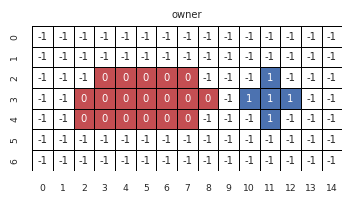

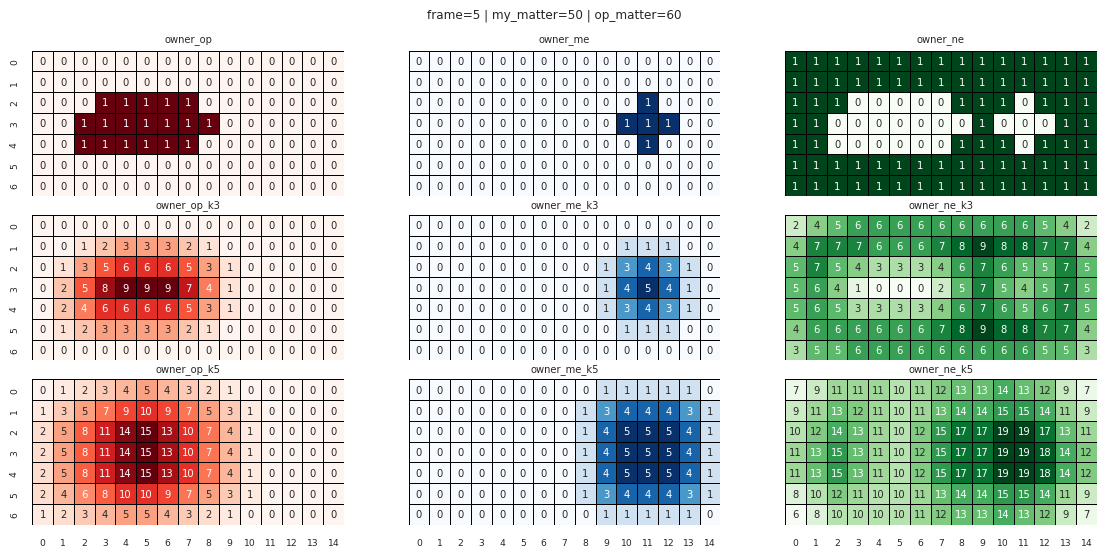

In [8]:
default_params = {'annot': True, 'fmt': "d", 'linecolor': 'black', 'linewidths': .5, 'square': True, 'cbar': False}

frame, my_matter, op_matter, input_array, board = input.all(5)

plt.figure(figsize=(4, 3))
sns.heatmap(**default_params, data=board.owner, cmap=['white','r','b']).set_title('owner')
plt.show()

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 6), sharex=True, sharey=True)
plt.tight_layout(h_pad=1, pad=5)

plt.suptitle(f'{frame=} | {my_matter=} | {op_matter=}')

sns.heatmap(**default_params, ax=ax[0, 0], data=board.owner == 0, cmap='Reds').set_title('owner_op')
sns.heatmap(**default_params, ax=ax[0, 1], data=board.owner == 1, cmap='Blues').set_title('owner_me')
sns.heatmap(**default_params, ax=ax[0, 2], data=board.owner == -1, cmap='Greens').set_title('owner_ne')
sns.heatmap(**default_params, ax=ax[1, 0], data=board.owner_op_k3, cmap='Reds').set_title('owner_op_k3')
sns.heatmap(**default_params, ax=ax[1, 1], data=board.owner_me_k3, cmap='Blues').set_title('owner_me_k3')
sns.heatmap(**default_params, ax=ax[1, 2], data=board.owner_ne_k3, cmap='Greens').set_title('owner_ne_k3')
sns.heatmap(**default_params, ax=ax[2, 0], data=board.owner_op_k5, cmap='Reds').set_title('owner_op_k5')
sns.heatmap(**default_params, ax=ax[2, 1], data=board.owner_me_k5, cmap='Blues').set_title('owner_me_k5')
sns.heatmap(**default_params, ax=ax[2, 2], data=board.owner_ne_k5, cmap='Greens').set_title('owner_ne_k5')
plt.show()

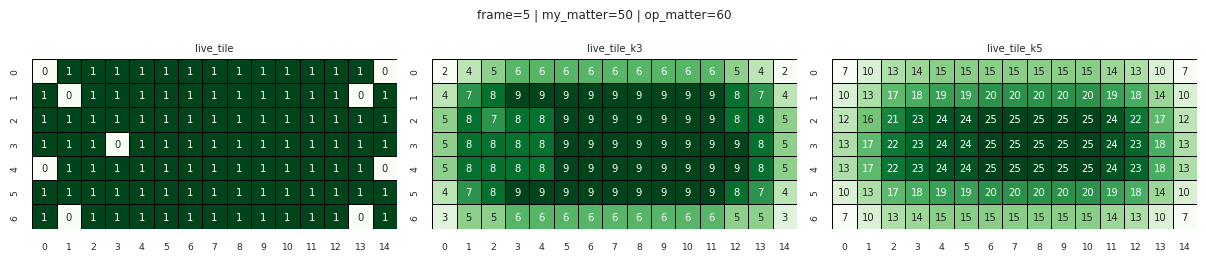

In [9]:
default_params = {'annot': True, 'fmt': "d", 'linecolor': 'black', 'linewidths': .5, 'square': True, 'cbar': False}

frame, my_matter, op_matter, input_array, board = input.all(5)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
plt.tight_layout(pad=0)

plt.suptitle(f'{frame=} | {my_matter=} | {op_matter=}')

sns.heatmap(**default_params, ax=ax[0], data=board.live_tile, cmap='Greens').set_title('live_tile')
sns.heatmap(**default_params, ax=ax[1], data=board.live_tile_k3, cmap='Greens').set_title('live_tile_k3')
sns.heatmap(**default_params, ax=ax[2], data=board.live_tile_k5, cmap='Greens').set_title('live_tile_k5')
plt.show()

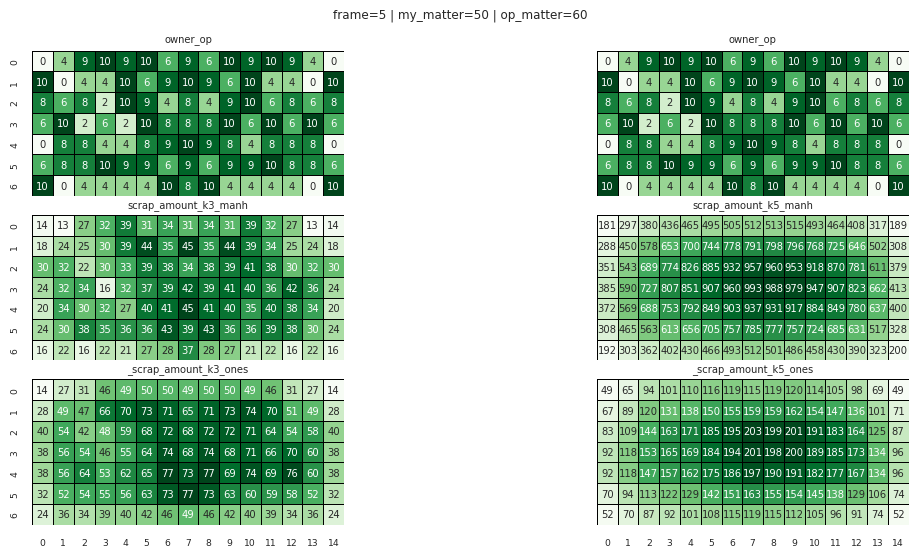

In [4]:
default_params = {'annot': True, 'fmt': "d", 'linecolor': 'black', 'linewidths': .5, 'square': True, 'cbar': False}

frame, my_matter, op_matter, input_array, board = input.all(5)

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 6), sharex=True, sharey=True)
plt.tight_layout(h_pad=1, pad=5)

plt.suptitle(f'{frame=} | {my_matter=} | {op_matter=}')

sns.heatmap(**default_params, ax=ax[0, 0], data=board.scrap_amount, cmap='Greens').set_title('owner_op')
sns.heatmap(**default_params, ax=ax[0, 1], data=board.scrap_amount, cmap='Greens').set_title('owner_op')

sns.heatmap(**default_params, ax=ax[1, 0], data=board.scrap_amount_k3_manh, cmap='Greens').set_title('scrap_amount_k3_manh')
sns.heatmap(**default_params, ax=ax[1, 1], data=board.scrap_amount_k5_manh, cmap='Greens').set_title('scrap_amount_k5_manh')

sns.heatmap(**default_params, ax=ax[2, 0], data=board._scrap_amount_k3_ones, cmap='Greens').set_title('_scrap_amount_k3_ones')
sns.heatmap(**default_params, ax=ax[2, 1], data=board._scrap_amount_k5_ones, cmap='Greens').set_title('_scrap_amount_k5_ones')
plt.show()

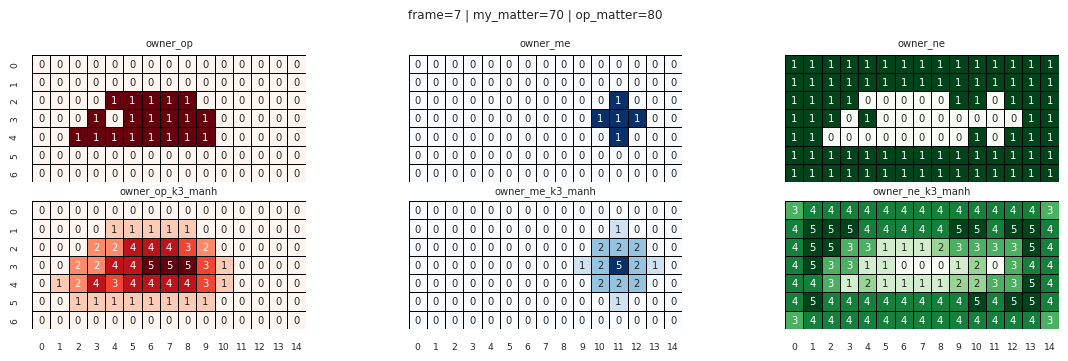

In [50]:
default_params = {'annot': True, 'fmt': "d", 'linecolor': 'black', 'linewidths': .5, 'square': True, 'cbar': False}

input = Input(log_file='right.txt')
last_frame = input.max_frame

frame, my_matter, op_matter, input_array, board = input.all(7)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 4), sharex=True, sharey=True)
plt.tight_layout(h_pad=1, pad=5)

plt.suptitle(f'{frame=} | {my_matter=} | {op_matter=}')

sns.heatmap(**default_params, ax=ax[0, 0], data=board.owner_op, cmap='Reds').set_title('owner_op')
sns.heatmap(**default_params, ax=ax[1, 0], data=board.owner_op_k3_manh, cmap='Reds').set_title('owner_op_k3_manh')

sns.heatmap(**default_params, ax=ax[0, 1], data=board.owner_me, cmap='Blues').set_title('owner_me')
sns.heatmap(**default_params, ax=ax[1, 1], data=board.owner_me_k3_manh, cmap='Blues').set_title('owner_me_k3_manh')

sns.heatmap(**default_params, ax=ax[0, 2], data=board.owner_ne, cmap='Greens').set_title('owner_ne')
sns.heatmap(**default_params, ax=ax[1, 2], data=board.owner_ne_k3_manh, cmap='Greens').set_title('owner_ne_k3_manh')
plt.show()

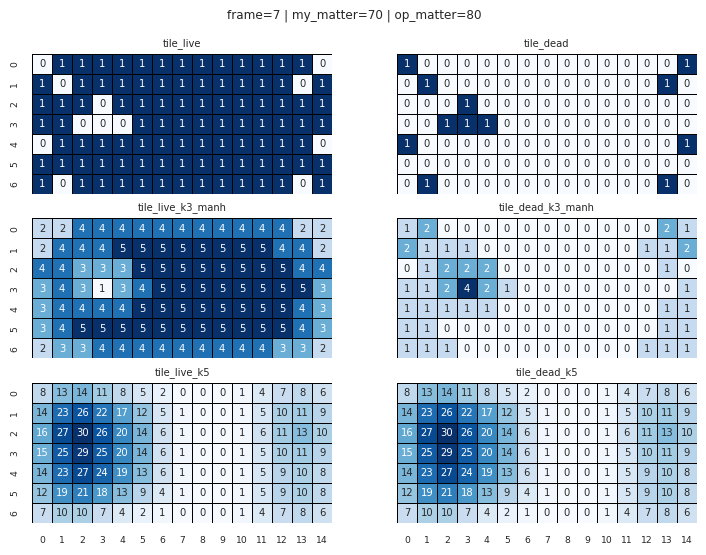

In [53]:
default_params = {'annot': True, 'fmt': "d", 'linecolor': 'black', 'linewidths': .5, 'square': True, 'cbar': False}

input = Input(log_file='right.txt')
last_frame = input.max_frame

frame, my_matter, op_matter, input_array, board = input.all(7)

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(8, 6), sharex=True, sharey=True)
plt.tight_layout(h_pad=1, pad=5)

plt.suptitle(f'{frame=} | {my_matter=} | {op_matter=}')

sns.heatmap(**default_params, ax=ax[0, 0], data=board.tile_live, cmap='Blues').set_title('tile_live')
sns.heatmap(**default_params, ax=ax[1, 0], data=board.tile_live_k3_manh, cmap='Blues').set_title('tile_live_k3_manh')
sns.heatmap(**default_params, ax=ax[2, 0], data=board.tile_live_k5, cmap='Blues').set_title('tile_live_k5')

sns.heatmap(**default_params, ax=ax[0, 1], data=board.tile_dead, cmap='Blues').set_title('tile_dead')
sns.heatmap(**default_params, ax=ax[1, 1], data=board.tile_dead_k3_manh, cmap='Blues').set_title('tile_dead_k3_manh')
sns.heatmap(**default_params, ax=ax[2, 1], data=board.tile_dead_k5, cmap='Blues').set_title('tile_dead_k5')
plt.show()

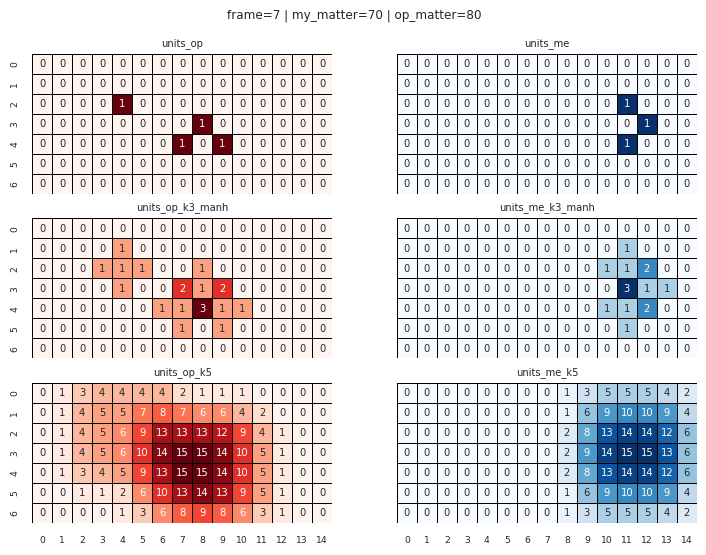

In [56]:
default_params = {'annot': True, 'fmt': "d", 'linecolor': 'black', 'linewidths': .5, 'square': True, 'cbar': False}

input = Input(log_file='right.txt')
last_frame = input.max_frame

frame, my_matter, op_matter, input_array, board = input.all(7)

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(8, 6), sharex=True, sharey=True)
plt.tight_layout(h_pad=1, pad=5)

plt.suptitle(f'{frame=} | {my_matter=} | {op_matter=}')

sns.heatmap(**default_params, ax=ax[0, 0], data=board.units_op, cmap='Reds').set_title('units_op')
sns.heatmap(**default_params, ax=ax[1, 0], data=board.units_op_k3_manh, cmap='Reds').set_title('units_op_k3_manh')
sns.heatmap(**default_params, ax=ax[2, 0], data=board.units_op_k5, cmap='Reds').set_title('units_op_k5')

sns.heatmap(**default_params, ax=ax[0, 1], data=board.units_me, cmap='Blues').set_title('units_me')
sns.heatmap(**default_params, ax=ax[1, 1], data=board.units_me_k3_manh, cmap='Blues').set_title('units_me_k3_manh')
sns.heatmap(**default_params, ax=ax[2, 1], data=board.units_me_k5, cmap='Blues').set_title('units_me_k5')

plt.show()

# Features to keep

### Scrap amount

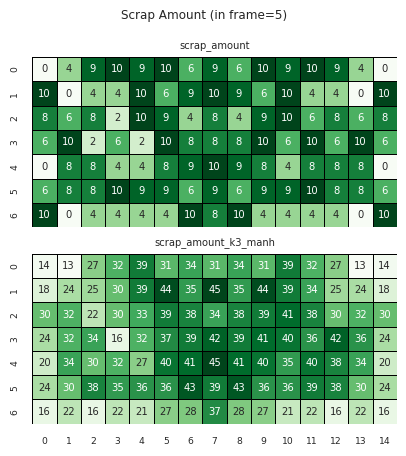

In [125]:
feature = "Scrap Amount"

default_params = {'annot': True, 'fmt': "d", 'linecolor': 'black', 'linewidths': .5, 'square': True, 'cbar': False}

frame, my_matter, op_matter, input_array, board = input.all(5)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(5, 5), sharex=True, sharey=True)
plt.tight_layout(h_pad=1, pad=5)

sns.heatmap(**default_params, ax=ax[0], data=board.scrap_amount, cmap='Greens').set_title('scrap_amount')
sns.heatmap(**default_params, ax=ax[1], data=board.scrap_amount_k3_manh, cmap='Greens').set_title('scrap_amount_k3_manh')

plt.suptitle(f'{feature} (in {frame=})')
plt.show()

### Owner

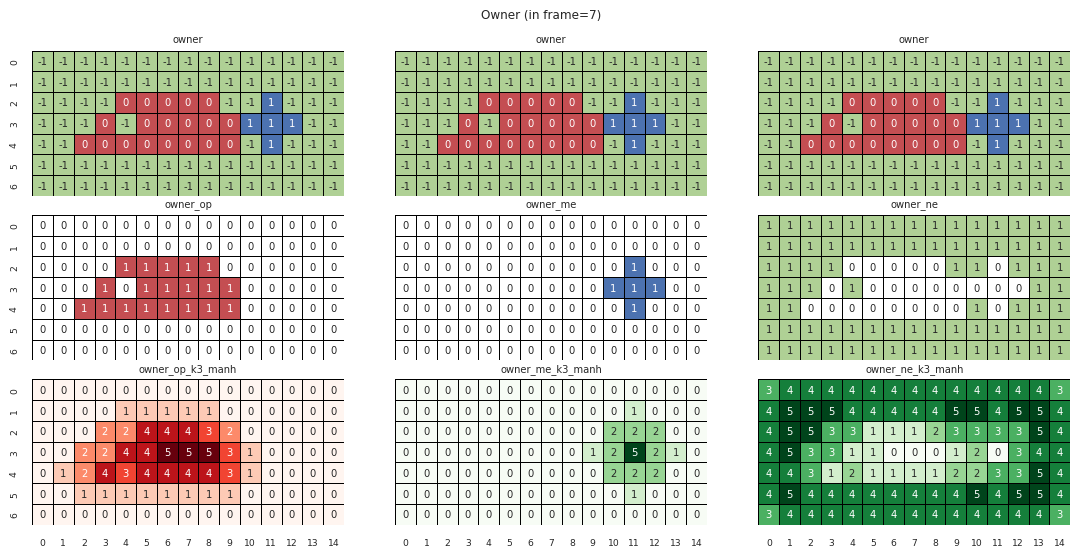

In [148]:
feature = "Owner"

default_params = {'annot': True, 'fmt': "d", 'linecolor': 'black', 'linewidths': .5, 'square': True, 'cbar': False}

input = Input(log_file='right.txt')
last_frame = input.max_frame

frame, my_matter, op_matter, input_array, board = input.all(7)

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 6), sharex=True, sharey=True)
plt.tight_layout(h_pad=1, w_pad=1, pad=5)

sns.heatmap(**default_params, ax=ax[0, 0], data=board.owner, cmap=['#afd095','r','b']).set_title('owner')
sns.heatmap(**default_params, ax=ax[1, 0], data=board.owner_op, cmap=['white', 'r']).set_title('owner_op')
sns.heatmap(**default_params, ax=ax[2, 0], data=board.owner_op_k3_manh, cmap='Reds').set_title('owner_op_k3_manh')

sns.heatmap(**default_params, ax=ax[0, 1], data=board.owner, cmap=['#afd095','r','b']).set_title('owner')
sns.heatmap(**default_params, ax=ax[1, 1], data=board.owner_me, cmap=['white', 'b']).set_title('owner_me')
sns.heatmap(**default_params, ax=ax[2, 1], data=board.owner_me_k3_manh, cmap='Greens').set_title('owner_me_k3_manh')

sns.heatmap(**default_params, ax=ax[0, 2], data=board.owner, cmap=['#afd095','r','b']).set_title('owner')
sns.heatmap(**default_params, ax=ax[1, 2], data=board.owner_ne, cmap=['white', '#afd095']).set_title('owner_ne')
sns.heatmap(**default_params, ax=ax[2, 2], data=board.owner_ne_k3_manh, cmap='Greens').set_title('owner_ne_k3_manh')

plt.suptitle(f'{feature} (in {frame=})')
plt.show()

### 

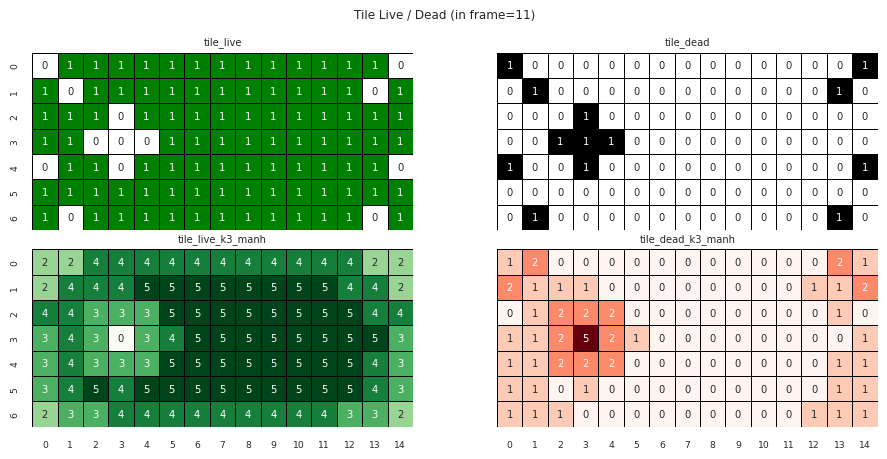

In [139]:
feature = "Tile Live / Dead"

default_params = {'annot': True, 'fmt': "d", 'linecolor': 'black', 'linewidths': .5, 'square': True, 'cbar': False}

input = Input(log_file='right.txt')
last_frame = input.max_frame

frame, my_matter, op_matter, input_array, board = input.all(last_frame)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 5), sharex=True, sharey=True)
plt.tight_layout(h_pad=1, pad=5)

sns.heatmap(**default_params, ax=ax[0, 0], data=board.tile_live, cmap=['White', 'Green']).set_title('tile_live')
sns.heatmap(**default_params, ax=ax[1, 0], data=board.tile_live_k3_manh, cmap='Greens').set_title('tile_live_k3_manh')

sns.heatmap(**default_params, ax=ax[0, 1], data=board.tile_dead, cmap=['White', 'Black']).set_title('tile_dead')
sns.heatmap(**default_params, ax=ax[1, 1], data=board.tile_dead_k3_manh, cmap='Reds').set_title('tile_dead_k3_manh')

plt.suptitle(f'{feature} (in {frame=})')
plt.show()

### units

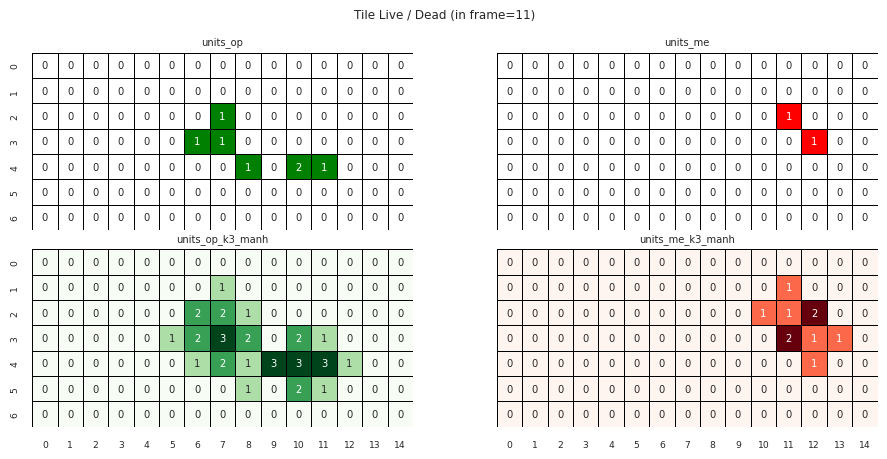

In [141]:
feature = "Tile Live / Dead"

default_params = {'annot': True, 'fmt': "d", 'linecolor': 'black', 'linewidths': .5, 'square': True, 'cbar': False}

input = Input(log_file='right.txt')
last_frame = input.max_frame

frame, my_matter, op_matter, input_array, board = input.all(last_frame)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 5), sharex=True, sharey=True)
plt.tight_layout(h_pad=1, pad=5)

sns.heatmap(**default_params, ax=ax[0, 0], data=board.units_op, cmap=['White', 'Green']).set_title('units_op')
sns.heatmap(**default_params, ax=ax[1, 0], data=board.units_op_k3_manh, cmap='Greens').set_title('units_op_k3_manh')

sns.heatmap(**default_params, ax=ax[0, 1], data=board.units_me, cmap=['White', 'Red']).set_title('units_me')
sns.heatmap(**default_params, ax=ax[1, 1], data=board.units_me_k3_manh, cmap='Reds').set_title('units_me_k3_manh')

plt.suptitle(f'{feature} (in {frame=})')
plt.show()

# Stacked

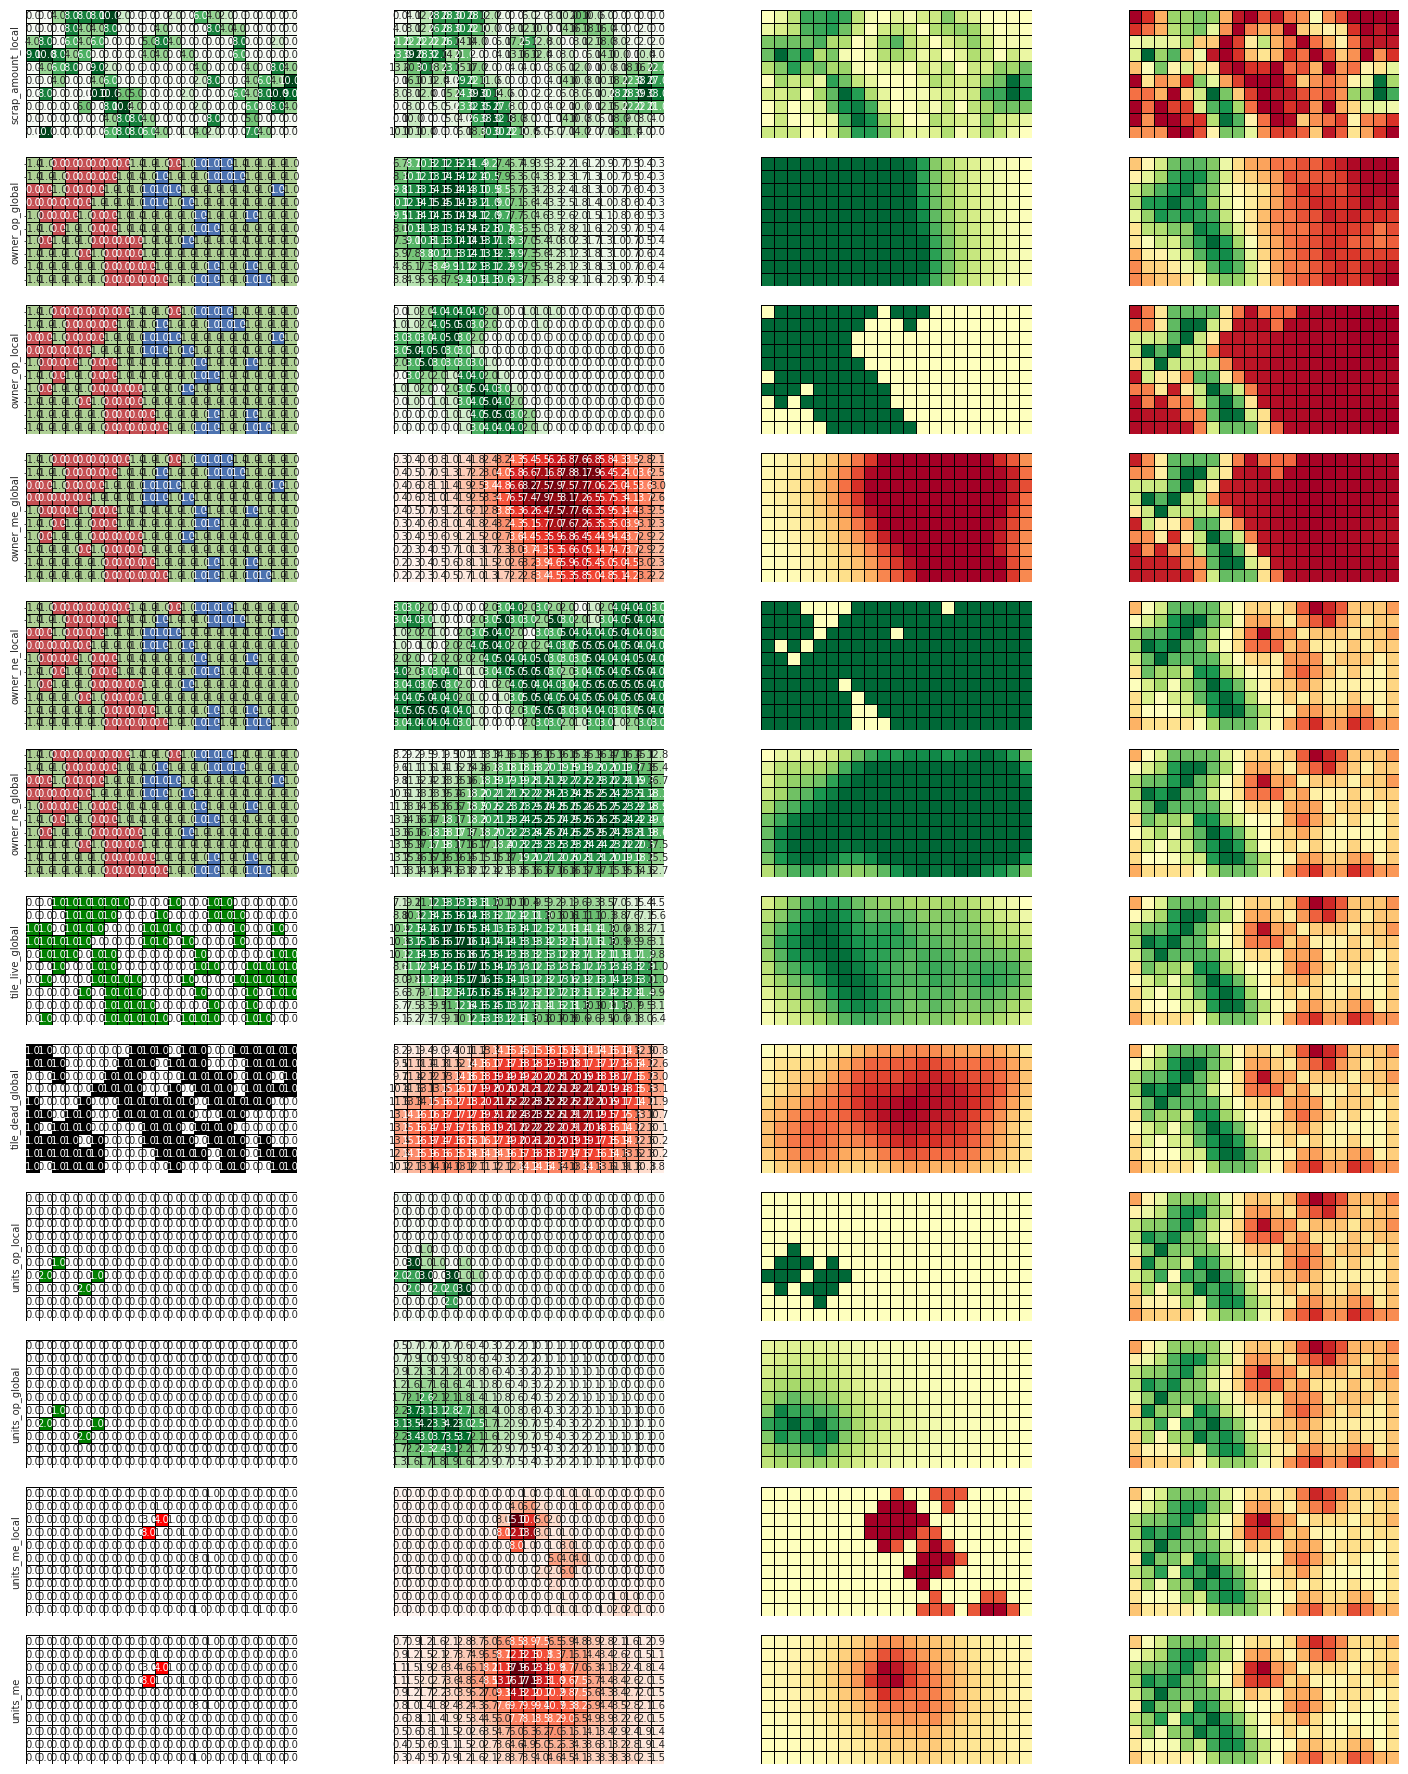

In [803]:
input = Input(log_file='issue.txt')

min_max = lambda x: (x - x.min()) / (x.max() - x.min())

feature = "Stacked"
default_params1 = {'linecolor': 'black', 'linewidths': .5, 'square': True, 'cbar': False, 'annot': True, 'fmt': ".1f"}
default_params2 = {'linecolor': 'black', 'linewidths': .5, 'square': True, 'cbar': False, 'vmin': -1, 'vmax': 1}
default_params3 = {'linecolor': 'black', 'linewidths': .5, 'square': True, 'cbar': False}
frame, my_matter, op_matter, input_array, board = input.all(1)
fig, ax = plt.subplots(nrows=12, ncols=4, figsize=(15, 18), sharex=True, sharey=True)
plt.tight_layout(h_pad=1, pad=1)

a = np.full_like(board.scrap_amount, 0, dtype=np.float64)

normalise = {
    'scrap_amount_local': +1 * min_max(board.scrap_amount_local),
    'owner_op_local':     +40 * min_max(board.owner_op_local),
    'owner_op_global':    +4 * min_max(board.owner_op_global),
    'owner_me_local':     -20 * min_max(board.owner_me_local),
    'owner_me_global':    -2 * min_max(board.owner_me_global),
    'owner_ne_local':     +20 * min_max(board.owner_ne_local),
    'owner_ne_global':    +2 * min_max(board.owner_ne_global),
    'tile_live_global':   +1 * min_max(board.tile_live_global),
    'tile_dead_global':   -1 * min_max(board.tile_dead_global),
    'units_op_local':     +10 * min_max(board.units_op_local),
    'units_op_global':    +1 * min_max(board.units_op_global),
    'units_me_local':     -10 * min_max(board.units_me_local),
    'units_me_global':    -1 * min_max(board.units_me_global),
}

i = -1

i += 1
a += normalise['scrap_amount_local']
sns.heatmap(**default_params1, ax=ax[i, 0], data=board.scrap_amount, cmap='Greens')
sns.heatmap(**default_params1, ax=ax[i, 1], data=board.scrap_amount_local, cmap='Greens')
sns.heatmap(**default_params2, ax=ax[i, 2], data=normalise['scrap_amount_local'], cmap='RdYlGn')
sns.heatmap(**default_params3, ax=ax[i, 3], data=a, cmap='RdYlGn')
ax[i, 0].set_ylabel('scrap_amount_local')

i += 1
a += normalise['owner_op_global']
sns.heatmap(**default_params1, ax=ax[i, 0], data=board.owner, cmap=['#afd095','r','b'])
sns.heatmap(**default_params1, ax=ax[i, 1], data=board.owner_op_global, cmap='Greens')
sns.heatmap(**default_params2, ax=ax[i, 2], data=normalise['owner_op_global'], cmap='RdYlGn')
sns.heatmap(**default_params3, ax=ax[i, 3], data=a, cmap='RdYlGn')
ax[i, 0].set_ylabel('owner_op_global')

i += 1
a += normalise['owner_op_local']
sns.heatmap(**default_params1, ax=ax[i, 0], data=board.owner, cmap=['#afd095','r','b'])
sns.heatmap(**default_params1, ax=ax[i, 1], data=board.owner_op_local, cmap='Greens')
sns.heatmap(**default_params2, ax=ax[i, 2], data=normalise['owner_op_local'], cmap='RdYlGn')
sns.heatmap(**default_params3, ax=ax[i, 3], data=a, cmap='RdYlGn')
ax[i, 0].set_ylabel('owner_op_local')

i += 1
a += normalise['owner_me_global']
sns.heatmap(**default_params1, ax=ax[i, 0], data=board.owner, cmap=['#afd095','r','b'])
sns.heatmap(**default_params1, ax=ax[i, 1], data=board.owner_me_global, cmap='Reds')
sns.heatmap(**default_params2, ax=ax[i, 2], data=normalise['owner_me_global'], cmap='RdYlGn')
sns.heatmap(**default_params3, ax=ax[i, 3], data=a, cmap='RdYlGn')
ax[i, 0].set_ylabel('owner_me_global')

i += 1
a += normalise['owner_ne_local']
sns.heatmap(**default_params1, ax=ax[i, 0], data=board.owner, cmap=['#afd095','r','b'])
sns.heatmap(**default_params1, ax=ax[i, 1], data=board.owner_ne_local, cmap='Greens')
sns.heatmap(**default_params2, ax=ax[i, 2], data=normalise['owner_ne_local'], cmap='RdYlGn')
sns.heatmap(**default_params3, ax=ax[i, 3], data=a, cmap='RdYlGn')
ax[i, 0].set_ylabel('owner_ne_local')

i += 1
a += normalise['owner_ne_global']
sns.heatmap(**default_params1, ax=ax[i, 0], data=board.owner, cmap=['#afd095','r','b'])
sns.heatmap(**default_params1, ax=ax[i, 1], data=board.owner_ne_global, cmap='Greens')
sns.heatmap(**default_params2, ax=ax[i, 2], data=normalise['owner_ne_global'], cmap='RdYlGn')
sns.heatmap(**default_params3, ax=ax[i, 3], data=a, cmap='RdYlGn')
ax[i, 0].set_ylabel('owner_ne_global')

i += 1
a += normalise['tile_live_global']
sns.heatmap(**default_params1, ax=ax[i, 0], data=board.tile_live, cmap=['White', 'Green'])
sns.heatmap(**default_params1, ax=ax[i, 1], data=board.tile_live_global, cmap='Greens')
sns.heatmap(**default_params2, ax=ax[i, 2], data=normalise['tile_live_global'], cmap='RdYlGn')
sns.heatmap(**default_params3, ax=ax[i, 3], data=a, cmap='RdYlGn')
ax[i, 0].set_ylabel('tile_live_global')

i += 1
a += normalise['tile_dead_global']
sns.heatmap(**default_params1, ax=ax[i, 0], data=board.tile_dead, cmap=['White', 'Black'])
sns.heatmap(**default_params1, ax=ax[i, 1], data=board.tile_dead_global, cmap='Reds')
sns.heatmap(**default_params2, ax=ax[i, 2], data=normalise['tile_dead_global'], cmap='RdYlGn')
sns.heatmap(**default_params3, ax=ax[i, 3], data=a, cmap='RdYlGn')
ax[i, 0].set_ylabel('tile_dead_global')

i += 1
a += normalise['units_op_local']
sns.heatmap(**default_params1, ax=ax[i, 0], data=board.units_op, cmap=['White', 'Green'])
sns.heatmap(**default_params1, ax=ax[i, 1], data=board.units_op_local, cmap='Greens')
sns.heatmap(**default_params2, ax=ax[i, 2], data=normalise['units_op_local'], cmap='RdYlGn')
sns.heatmap(**default_params3, ax=ax[i, 3], data=a, cmap='RdYlGn')
ax[i, 0].set_ylabel('units_op_local')

i += 1
a += normalise['units_op_global']
sns.heatmap(**default_params1, ax=ax[i, 0], data=board.units_op, cmap=['White', 'Green'])
sns.heatmap(**default_params1, ax=ax[i, 1], data=board.units_op_global, cmap='Greens')
sns.heatmap(**default_params2, ax=ax[i, 2], data=normalise['units_op_global'], cmap='RdYlGn')
sns.heatmap(**default_params3, ax=ax[i, 3], data=a, cmap='RdYlGn')
ax[i, 0].set_ylabel('units_op_global')

i += 1
a += normalise['units_me_local']
sns.heatmap(**default_params1, ax=ax[i, 0], data=board.units_me, cmap=['White', 'Red'])
sns.heatmap(**default_params1, ax=ax[i, 1], data=board.units_me_local, cmap='Reds')
sns.heatmap(**default_params2, ax=ax[i, 2], data=normalise['units_me_local'], cmap='RdYlGn')
sns.heatmap(**default_params3, ax=ax[i, 3], data=a, cmap='RdYlGn')
ax[i, 0].set_ylabel('units_me_local')

i += 1
a += normalise['units_me_global']
sns.heatmap(**default_params1, ax=ax[i, 0], data=board.units_me, cmap=['White', 'Red'])
sns.heatmap(**default_params1, ax=ax[i, 1], data=board.units_me_global, cmap='Reds')
sns.heatmap(**default_params2, ax=ax[i, 2], data=normalise['units_me_global'], cmap='RdYlGn')
sns.heatmap(**default_params3, ax=ax[i, 3], data=a, cmap='RdYlGn')
ax[i, 0].set_ylabel('units_me')

# plt.suptitle(f'{feature} (in {frame=})')
for ax in ax.flatten():
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

<AxesSubplot: >

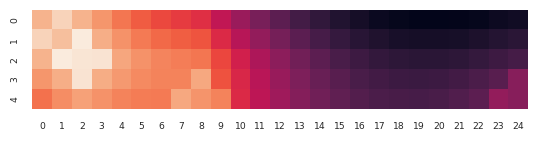

In [784]:
from scipy.signal import convolve2d

rows, cols = 5, 25

n = max(rows, cols) * 2 + 1

p = 0.9
a = np.concatenate([np.arange(n//2, 0, -1), [0.25], np.arange(1, n//2+1, 1)], axis=0)
X, Y = np.meshgrid(a, a)
filter = p ** (X+Y)
filter[n//2 - 1: n//2 + 2, n//2] = 1
filter[n//2, n//2 - 1: n//2 + 2] = 1

a = np.zeros((rows, cols))
a[0, 0] = 1
a[4, 8] = 1
a[2, 2] = 1
a[rows-1, cols-1] = 1

sns.heatmap(convolve2d(a, filter, mode='same'), square=True, cbar=False)

In [790]:
min_max = lambda x: (x - x.min()) / (x.max() - x.min() + 1e-10)

In [794]:
min_max(np.array([-21,1,2]))

array([0.  , 0.96, 1.  ])

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]])

In [817]:
input = Input(log_file='issue.txt')
frame, my_matter, op_matter, input_array, board = input.all(1)

(board.owner_op_3_3_sq) + (board.scrap_amount_local / 100)

array([[0.  , 1.04, 3.12, 5.28, 6.28, 6.3 , 5.28, 3.12, 1.02, 0.  , 1.06, 1.02, 1.08, 0.1 , 0.2 , 0.1 , 0.06, 0.  , 0.  , 0.  , 0.  ],
       [2.04, 3.08, 5.12, 7.26, 9.28, 8.3 , 6.22, 3.1 , 1.  , 0.09, 1.12, 1.1 , 1.  , 0.14, 0.16, 0.18, 0.16, 0.04, 0.  , 0.02, 0.  ],
       [4.21, 5.22, 6.22, 7.22, 8.26, 6.14, 3.14, 1.  , 0.05, 0.17, 0.25, 0.12, 0.08, 0.  , 0.08, 0.12, 0.18, 0.08, 0.02, 0.02, 0.02],
       [5.23, 7.39, 8.28, 7.32, 7.14, 5.21, 3.02, 1.  , 0.04, 0.13, 0.16, 0.12, 0.04, 0.08, 0.  , 0.06, 0.14, 0.1 , 0.  , 0.1 , 0.04],
       [3.13, 6.2 , 7.3 , 6.18, 5.23, 5.15, 4.17, 2.02, 0.  , 0.04, 0.04, 0.  , 0.08, 0.06, 0.12, 0.  , 0.1 , 0.08, 0.18, 0.16, 0.22],
       [2.  , 4.16, 5.1 , 3.12, 4.04, 6.29, 7.22, 5.11, 2.05, 1.  , 0.  , 0.  , 0.04, 0.14, 0.1 , 0.08, 0.1 , 0.18, 0.22, 0.38, 0.27],
       [1.08, 2.08, 2.12, 2.  , 3.15, 6.24, 7.39, 7.3 , 4.14, 2.05, 0.  , 0.02, 0.02, 0.06, 0.08, 0.06, 0.1 , 0.28, 0.28, 0.39, 0.33],
       [1.  , 1.08, 1.  , 1.05, 2.05, 5.23, 7.32, 9.35,

In [870]:
row, col = board.tile_dead.shape

sns.heatmap(board.owner, square=True, cbar=False, )

In [873]:
X= np.concatenate((
    [(r, c) for r in range(row) for c in range(col)],
    # board.tile_dead.reshape(-1, 1),
    board.owner_me.reshape(-1, 1),
    board.owner_op.reshape(-1, 1),
    board.owner_ne.reshape(-1, 1),
), axis=1)


In [889]:
board.owner

array([[-1, -1,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0, -1,  1,  1,  1, -1, -1, -1, -1, -1],
       [-1, -1, -1,  0,  0,  0,  0, -1, -1, -1,  1, -1, -1, -1,  1,  1,  1, -1, -1, -1, -1],
       [ 0,  0, -1,  0,  0,  0, -1, -1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1],
       [ 0,  0,  0,  0,  0, -1, -1, -1, -1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1,  0,  0,  0, -1,  0,  0, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1, -1, -1, -1],
       [-1, -1,  0, -1, -1,  0,  0, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1],
       [-1,  0, -1, -1, -1,  0,  0,  0,  0, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1,  0, -1,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1,  0,  0,  0,  0, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0, -1, -1,  1,  1, -1, -1,  1,  1, -1, -1]])

In [897]:
board.owner - board.tile_dead.astype(int)

array([[-2, -2,  0,  0,  0,  0,  0,  0, -2, -2, -2,  0, -2,  0,  1,  1, -2, -2, -2, -2, -2],
       [-2, -2, -2,  0,  0,  0,  0, -2, -2, -2,  1, -2, -2, -2,  1,  1,  1, -2, -2, -2, -2],
       [ 0,  0, -2,  0,  0,  0, -2, -2, -2,  1,  1,  1, -2, -2, -2, -2, -1, -2, -2,  1, -2],
       [ 0,  0,  0,  0,  0, -2, -2, -2, -2,  1,  1, -2,  1, -2, -2, -2, -1, -2, -2, -2, -2],
       [-2,  0,  0,  0, -2,  0,  0, -2, -2, -2, -2, -2, -2,  1, -2, -2, -2,  0, -2, -1, -1],
       [-2, -2,  0, -2, -2,  0,  0, -2, -2, -2, -2, -2, -2,  1,  1, -2, -2, -1, -1, -1, -1],
       [-2,  0, -2, -2, -2,  0,  0,  0,  0, -2, -2, -2,  1, -2, -2, -2, -1, -1, -1, -1, -1],
       [-2, -2, -2, -2,  0, -2,  0,  0,  0, -2, -2, -2, -2, -1, -2, -2, -2, -1, -2, -1, -1],
       [-2, -2, -2, -2, -2, -2,  0,  0,  0,  0, -2, -2, -2, -2,  1, -2, -2,  1, -2, -2, -2],
       [-2, -1, -2, -2, -2, -2,  0,  0,  0,  0,  0, -2, -1,  1,  1, -2, -2,  1,  1, -2, -2]])

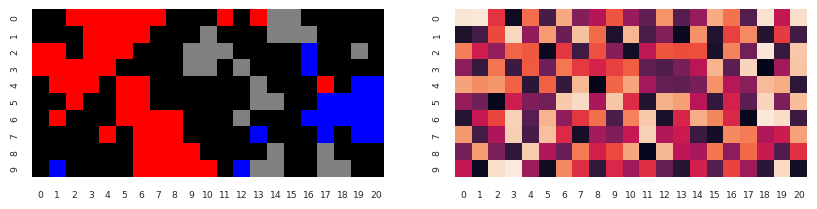

In [907]:
from sklearn.cluster import KMeans

input = Input(log_file='issue.txt')
frame, my_matter, op_matter, input_array, board = input.all(1)

X = np.concatenate((
    [(r, c) for r in range(row) for c in range(col)],
    (board.owner - board.tile_dead.astype(int)).reshape(-1, 1),
    # board.owner.reshape(-1, 1),
    # board.owner_me.reshape(-1, 1),
    # board.owner_op.reshape(-1, 1),
    # board.owner_ne.reshape(-1, 1),
), axis=1)

kmeans = KMeans(n_clusters=210).fit(X)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.heatmap((board.owner - board.tile_dead.astype(int)), square=True, cbar=False, cmap=['black', 'blue', 'red', 'grey'], ax=ax[0])
sns.heatmap(kmeans.labels_.reshape(board.tile_dead.shape), square=True, cbar=False, ax=ax[1])
plt.show()

In [941]:
from IPython.display import Image

def print_png(file, width, height):
    scale = 30
    return Image(file, width=width*scale, height=height*scale)

[[1 0 2 0 3 0 0 0 4 4 4 4]
 [1 0 0 0 0 0 0 5 0 4 4 4]
 [1 0 1 0 0 0 0 0 0 0 4 4]
 [1 0 1 0 6 0 0 0 0 4 4 4]
 [1 1 1 0 0 0 7 0 0 4 4 4]
 [1 1 1 1 0 0 7 0 0 0 4 4]]


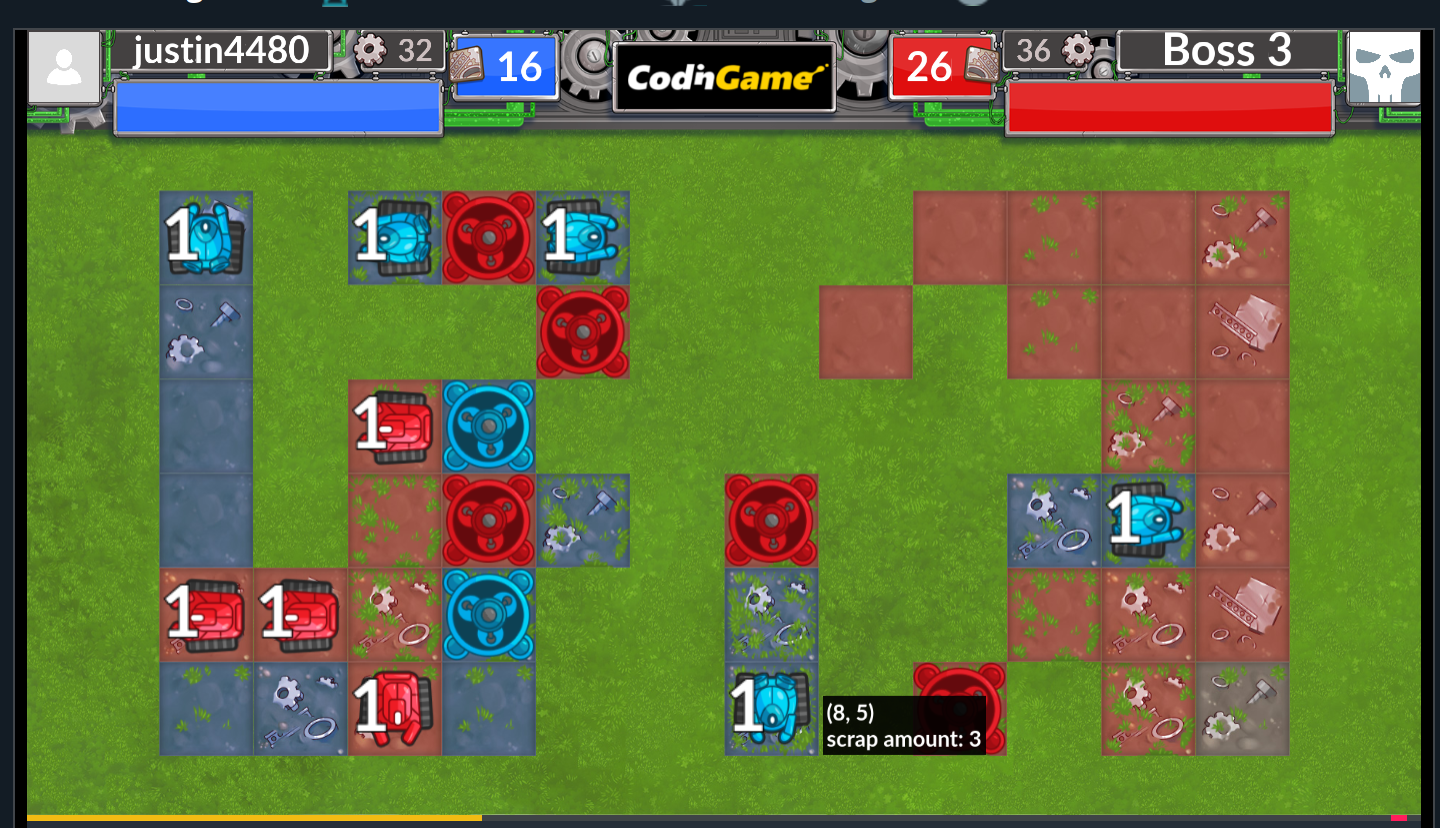

In [962]:
from scipy.ndimage import label

input = Input(log_file='boundaries.txt')
frame, my_matter, op_matter, input_array, board = input.all(1)

tile_cluster = label(
    input=board.tile_live.astype(int),
    structure=[[0,1,0],
               [1,1,1],
               [0,1,0]],
)[0]

print(tile_cluster)

print_png('input_logs/boundaries.png', 12, 6)

In [964]:
board.exclusive_tile_clusters.astype(int)

array([[1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]])

In [965]:
from scipy.ndimage import label

tile_cluster = label(
    input=board.tile_live.astype(int),
    structure=[[0,1,0],
               [1,1,1],
               [0,1,0]],
)[0]

exclusive_clusters = (
    set(np.unique(board.owner_op * tile_cluster))
    .intersection(set(np.unique(board.owner_me * tile_cluster)))
)

np.isin(tile_cluster, list(exclusive_clusters))

array([[ True,  True, False,  True, False,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True, False,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True, False,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True, False,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True, False,  True,  True,  True,  True,  True]])

{0, 1, 4}

array([[ True,  True, False,  True, False,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True, False,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True, False,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True, False,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True, False,  True,  True,  True,  True,  True]])